# Julia 基礎圖表繪製: Plots 套件

本範例需要使用到的套件有 Plots、StatsPlots，請在執行以下範例前先安裝。

```
] add Plots
] add StatsPlots
```

In [15]:
using RDatasets, Plots

## 圓餅圖

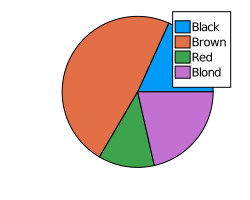

In [16]:
haireyecolor = dataset("datasets", "HairEyeColor")
haircolor = by(haireyecolor, :Hair, Freq=:Freq => sum)
p = pie(haircolor[!, :Hair], haircolor[!, :Freq]; size=(250, 200))

In [17]:
savefig(p, "pie.png")

## 樹狀圖

## Marginal histogram

In [18]:
using StatsPlots
gr()

┌ Info: Precompiling StatsPlots [f3b207a7-027a-5e70-b257-86293d7955fd]
└ @ Base loading.jl:1260


Plots.GRBackend()

┌ Warning: Attribute alias `ylabel` detected in the plot recipe defined for the signature (::Type{Val{:marginalhist}}, ::AbstractPlot). To ensure expected behavior it is recommended to use the default attribute `yguide`.
└ @ Plots C:\Users\Acer\.julia\packages\Plots\sbXPh\src\pipeline.jl:15
┌ Warning: Attribute alias `xlabel` detected in the plot recipe defined for the signature (::Type{Val{:marginalhist}}, ::AbstractPlot). To ensure expected behavior it is recommended to use the default attribute `xguide`.
└ @ Plots C:\Users\Acer\.julia\packages\Plots\sbXPh\src\pipeline.jl:15
┌ Warning: Attribute alias `ylabel` detected in the plot recipe defined for the signature (::Type{Val{:marginalhist}}, ::AbstractPlot). To ensure expected behavior it is recommended to use the default attribute `yguide`.
└ @ Plots C:\Users\Acer\.julia\packages\Plots\sbXPh\src\pipeline.jl:15
┌ Warning: Attribute alias `xlabel` detected in the plot recipe defined for the signature (::Type{Val{:marginalhist}}, ::Abs

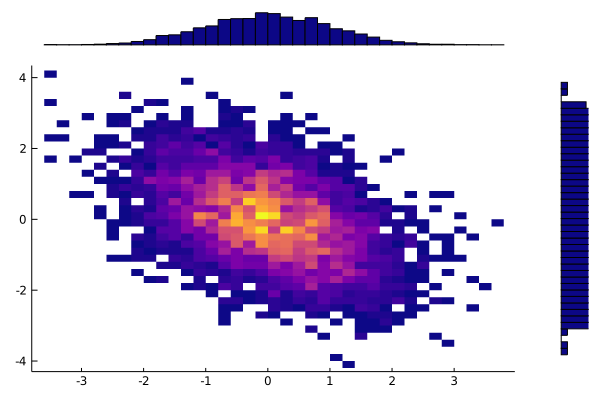

In [19]:
n = 5000
x = randn(n)
y = -0.5x + randn(n)
p = marginalhist(x, y, fc=:plasma, bins=40)

In [20]:
savefig(p, "marghist.png")

## 3D 繪圖

In [21]:
n = 500
x = range(-8., stop=8., length=n)
y = range(-2., stop=2., length=n)

-2.0:0.008016032064128256:2.0

In [22]:
f(x,y) = x*exp(-(x-round(Int, x))^2-y^2)

f (generic function with 1 method)

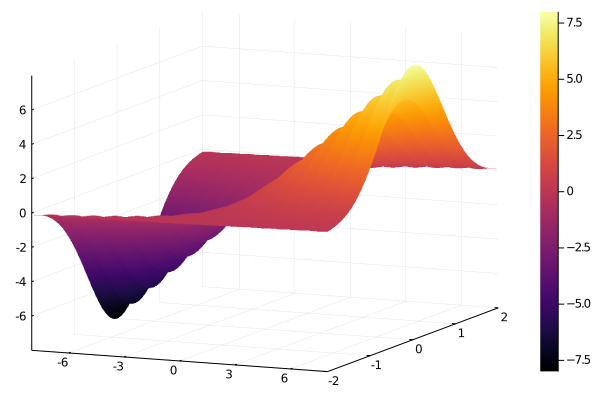

In [23]:
p = plot(x, y, f, st=:surface)

In [24]:
savefig(p, "3d_function.png")

## 3D 動畫

┌ Info: Saved animation to 
│   fn = D:\learning-julia\D23\tmp.gif
└ @ Plots C:\Users\Acer\.julia\packages\Plots\sbXPh\src\animation.jl:104


Plots.AnimatedGif("D:\\learning-julia\\D23\\tmp.gif")
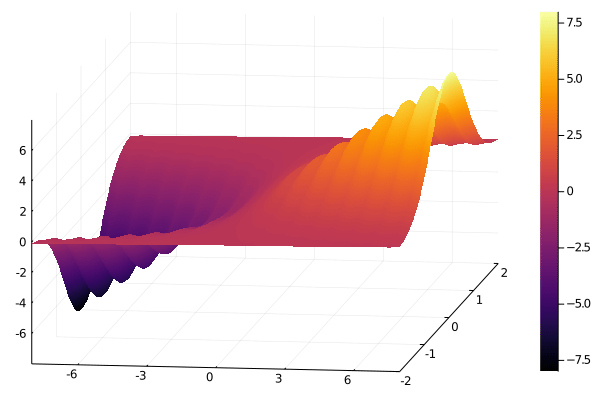

In [25]:
n = 500
x = range(-8., stop=8., length=n)
y = range(-2., stop=2., length=n)
f(x,y) = x*exp(-(x-round(Int, x))^2-y^2)
@gif for i in range(0, stop=2π, length=100)
    p = plot(x, y, f, st=:surface)
    plot!(p, camera=(15*cos(i), 40))
end

## 動畫輸出

┌ Info: Saved animation to 
│   fn = D:\learning-julia\D23\animate.gif
└ @ Plots C:\Users\Acer\.julia\packages\Plots\sbXPh\src\animation.jl:104


Plots.AnimatedGif("D:\\learning-julia\\D23\\animate.gif")
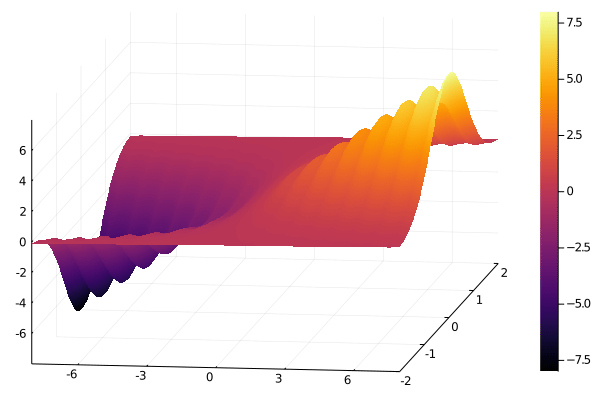

In [26]:
p = plot(1)
ani = @animate for i in range(0, stop=2π, length=100)
    p = plot(x, y, f, st=:surface)
    plot!(p, camera=(15*cos(i), 40))
end
gif(ani, "animate.gif", fps = 30)